In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Descriptive Statistics

In [2]:
# load necessary package
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
# generate a list of numeric values
salary=[3450,3550,3650,3480,3355,3310,3490,3730,3540,3925,3520,3480]
sorted(salary) # sort salary in ascending order

[3310, 3355, 3450, 3480, 3480, 3490, 3520, 3540, 3550, 3650, 3730, 3925]

## Measures of central tendency

- 같은 데이터 안에서도 central tendency는 다른 값을 가질 수 있다.
(*central tendency 은 곧 central tendency*)

- Mode는 두 개 이상일 수 있다. 단, 세개 이상의 최빈값이 존재하는 경우, 자료의 중심을 설명하는 것에 큰 도움이 되지 않기 때문에 일반적으로는 최빈값을 보고하지 않는다.

- Median은 왜도가 있는 자료에서 가장 적합하다. 왜냐하면 평균과 최빈값의 사이에 위치하기 때문이다.


In [4]:
np.mean(salary) # mean

np.float64(3540.0)

In [5]:
np.median(salary) # median

np.float64(3505.0)

In [6]:
stats.mode(salary) # mode with couts

ModeResult(mode=np.int64(3480), count=np.int64(2))

## Measures of variability/dispersion

- Range를 단독 지표로 사용하는 경우는 드물다.
- p백분위수 해석을 주의하자!

    p백순위수의 의미는, p백분위수보다 작은 데이터는 그 자료에서 p%가 있고 1-p퍼센트는 p백분위수보다 크다!!

- 만약 평균이 4이고 n=3일 때,
x1=2 x2=4 이면? x3는 자동적으로 나온다. (x1-평균)+(x2-평균)+(x3-평균)=0이어야 하므로,

그러므로 df=how many xi do we have to know ? - 2개만 알면 된다
그래서 표본의 자유도는 n-1이다.

(*자유도란 몇개의 xi가 자유로운가?로 생가하면 쉽다.)

- 모집단의 자유도의 경우 모집단의 평균을 알 수 없다. x1, x2를 알더라도 모평균을 모르기 때문에 x3 역시 알지 못한다. 그렇기 때문에 자유도가 n이다.

In [7]:
np.min(salary) # mininmum value

np.int64(3310)

In [8]:
np.max(salary) # maximum value

np.int64(3925)

In [9]:
np.max(salary)-np.min(salary) # range = maximum - minimum

np.int64(615)

In [10]:
np.ptp(salary) # calculate range directly by ptp (peak to peak)

np.int64(615)

In [11]:
np.percentile(salary,85, method='higher') # 85th percentile

np.int64(3730)

In [12]:
Q1=np.quantile(salary,q=0.25) # Q1 = 25th percentile
print(Q1)
Q2=np.quantile(salary,q=0.5) # Q2 = 50th percentile = median
print(Q2)
Q3=np.quantile(salary,q=0.75) # Q3 = 75th percentile
print(Q3)
IQR=Q3-Q1
print(IQR)

3472.5
3505.0
3575.0
102.5


In [13]:
variance=np.var(salary) # 분산
print(variance)

25154.166666666668


In [14]:
round(variance, 2) # round to the 2nd decimal place

np.float64(25154.17)

In [15]:
standd=np.std(salary) # 표준편차
print(standd)

158.60065153291984


In [16]:
round(standd, 2) # round to the 2nd decimal place

np.float64(158.6)

## boxplot

- q2 = Median

In [17]:
# load maplotlib package for data visualization
import matplotlib.pyplot as plt # impart maplotlib as plt

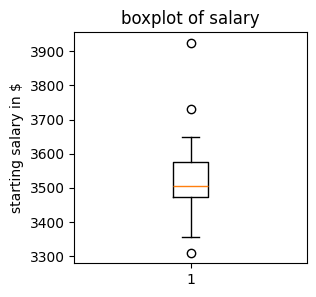

In [18]:
# generate boxplot
plt.figure(figsize=(3, 3)) # Width = 3 inches, Height = 3 inches
plt.boxplot(salary)
plt.title("boxplot of salary") # chart title
plt.ylabel("starting salary in $") # y-axis label
plt.show()

## Exercise for Descriptive Statistics with Actual Data

In [19]:
# load necessary packages
import numpy as np
from numpy import nan
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# loading CSV file stored in google drive
# your own file path should be defined--i.e., where your file is stored in google drive
file_path='/content/drive/MyDrive/data analysis and coding/PEW.csv'
# save data as pew dataframe
pew=pd.read_csv(file_path)

In [21]:
# q16 in pew (How often, if ever, do you talk about politics or current events with your family and friends?
# 1. Very often; 2. Sometimes; 3. Rarely; 4. Never; 8. Don’t know; 9. Refused)
pew['q16'].value_counts().sort_index(ascending=True) # 8 and 9 are missing values

,count
q16,
1,809
2,738
3,416
4,276
8,7
9,7


In [22]:
pew['q16m']=pew['q16'] # create a new variable q16m from q16 while copying all the values

In [23]:
# define the function to recode missing values
def recode_q16m(value):
    if value >= 8:
        return np.nan # recode values equal to ore greater than 8 into missing values
    else:
        return value # copy all the other values

In [24]:
# apply the function to the 'salary' column
pew['q16m'] = pew['q16m'].apply(recode_q16m)

In [25]:
pew['q16m'].value_counts(dropna=False).sort_index(ascending=True) # frequency showing missing value as NaN

,count
q16m,
1.0,809
2.0,738
3.0,416
4.0,276
NaN,14


In [26]:
np.mean(pew['q16m']) # mean

np.float64(2.071013845466726)

In [27]:
np.median(pew['q16m']) # median cannot be calculated with nan

np.float64(nan)

In [28]:
# drop missing values from data
pew_filtered = pew.dropna()

In [29]:
np.median(pew_filtered['q16m']) # median can now be calculated without nan in data

np.float64(2.0)

In [30]:
stats.mode(pew_filtered['q16m']) # mode

ModeResult(mode=np.float64(1.0), count=np.int64(809))

In [31]:
np.percentile(pew_filtered['q16m'],85)

np.float64(3.0)

In [32]:
Q1=np.quantile(pew_filtered['q16m'].dropna(),q=0.25) # Q1 = 25th percentile
print(Q1)
Q2=np.quantile(pew_filtered['q16m'].dropna(),q=0.5) # Q2 = 50th percentile = median
print(Q2)
Q3=np.quantile(pew_filtered['q16m'].dropna(),q=0.75) # Q3 = 75th percentile
print(Q3)
IQR=Q3-Q1
print(IQR)

1.0
2.0
3.0
2.0


In [33]:
variance=np.var(pew_filtered['q16m']) # variance
print(variance)
standd=np.std(pew_filtered['q16m']) # standard deviation
print(standd)

1.0351535500539493
1.0174249604044268


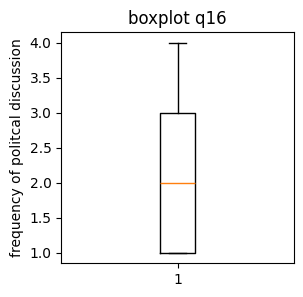

In [34]:
# generate boxplot
plt.figure(figsize=(3, 3)) # Width = 3 inches, Height = 3 inches
plt.boxplot(pew_filtered['q16m'])
plt.title("boxplot q16") # chart title
plt.ylabel("frequency of politcal discussion") # y-axis label
plt.show()

## Measures of Association

- 공분산이 양수이면, 같은 방향으로 움직인다.
- 공분산이 음수이면, 반대 방향으로 움직인다.
    분산은 음수가 될 수 없지만, 공분산은 음수가 될 수 있다.

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# generate a list of numeric values
no_ads=[2,5,1,3,4,1,5,3,4,2]
sales=[50,57,41,54,54,38,63,48,59,46]
cov_matrix=np.cov(no_ads, sales)
print(cov_matrix) # print covariance matrix
covariance = cov_matrix[0, 1] # index value in row 0 and column 1 (acutually 1st row and 2nd column)
print(covariance, '\n') # print covariance value a newline after with'\n'
corr_matrix=np.corrcoef(no_ads, sales)
print(corr_matrix) # print covariance matrix
correlation = corr_matrix[0, 1] # index value in row 0 and column 1 (acutually 1st row and 2nd column)
print(correlation, '\n') # print correlation value with a newline after with'\n'

[[ 2.22222222 11.        ]
 [11.         62.88888889]]
11.0 

[[1.         0.93049058]
 [0.93049058 1.        ]]
0.9304905807411791 



/tmp/ipython-input-4077052798.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


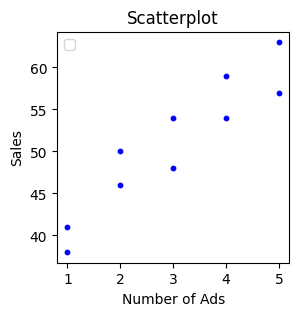

In [37]:
# Set the figure size
plt.figure(figsize=(3, 3))  # Width = 3 inches, Height = 3 inches
# Create scatter plot
plt.scatter(no_ads, sales, s=10, c='blue') # s=100 sets the marker size to 10 and c='blue' sets the marker color to blue
# Add labels and legend
plt.xlabel('Number of Ads')  # X-axis label
plt.ylabel('Sales')          # Y-axis label
plt.legend()
plt.title('Scatterplot')  # Chart title
plt.show()

# histogram

- Bar chart와 histogram은 둘 다 어떤 변수의 빈도수를 나타낸다.

    단, 히스토그램은 no gap, 바 그래프는 gap이 있다. 즉, 연속 변수와 이산변수의 차이이다.

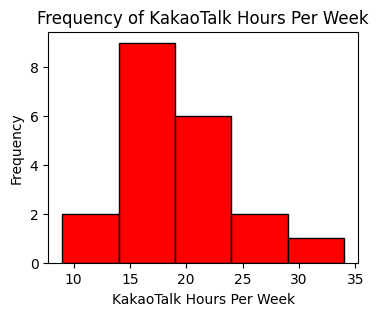

In [38]:
# Create a vector of KakaoTalk hours
kakao_hrs = [12, 15, 20, 22, 14, 14, 15, 27, 21, 18, 19, 18, 22, 33, 16, 18, 17, 23, 28, 13]

# Set the figure size
plt.figure(figsize=(4, 3))  # Width = 4 inches, Height = 3 inches

# Define the break points
breaks = [9, 14, 19, 24, 29, 34]

# Create a histogram with the specified break points
plt.hist(kakao_hrs, bins=breaks, color='red', edgecolor='black')

# Add x-axis label and main title
plt.xlabel("KakaoTalk Hours Per Week")
plt.ylabel("Frequency")
plt.title("Frequency of KakaoTalk Hours Per Week")

# Show the plot
plt.show()